<a href="https://colab.research.google.com/github/DexComputing/Reconhecimento-Facial-Com-valida-o-/blob/main/C%C3%B3pia_de_Codigo_APS_Reconhecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
# Tira a foto e solicita o cargo
image_file = take_photo()
cargo = input("Digite o cargo da pessoa: ")

<IPython.core.display.Javascript object>

Digite o cargo da pessoa: Diretor


In [ ]:
cofre = {
    "conteudo": "Informações sensíveis do meio ambiente.",
    "acesso": "Apenas o Ministro do Meio Ambiente pode acessar."
}

In [ ]:
# Verifica se o cargo é permitido para acessar o cofre
if cargo.lower() == "ministro do meio ambiente":
    print("Acesso ao cofre permitido.")
    print("Conteúdo do cofre:", cofre["conteudo"])
elif cargo.lower() == "diretor":
    print("Acesso a sala do cofre permitido, mas você não tem permissão para acessar o conteúdo do cofre.")
elif cargo.lower() == "funcionario":
    print("Acesso a sala do cofre negado,  você não tem permissão para acessar o conteúdo do cofre.")
else:
    print("Acesso negado. Apenas o 'Ministro do Meio Ambiente' e 'diretor' têm acesso a sala do cofre.")


Acesso a sala do cofre permitido, mas você não tem permissão para acessar o conteúdo do cofre.


Largura: 400 Altura: 300


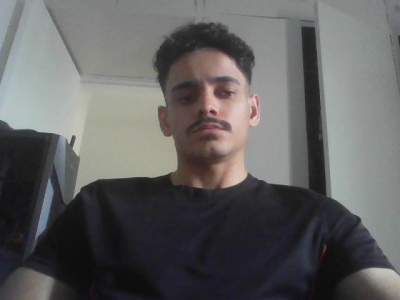

In [ ]:

# Carrega e redimensiona a imagem
image = cv2.imread(image_file)
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print("Largura:", w, "Altura:", h)
cv2_imshow(image)

In [ ]:
# Baixa os arquivos de rede neural para detecção de faces
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2024-11-09 14:59:28--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2024-11-09 14:59:29 (11.8 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2024-11-09 14:59:29--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:

print("[INFO] Carregando o modelo de detecção de faces...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] Carregando o modelo de detecção de faces...


In [ ]:

# Cria o blob da imagem e executa a detecção de faces
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
print("[INFO] Computando detecções de faces...")
net.setInput(blob)
detections = net.forward()

[INFO] Computando detecções de faces...


In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [ ]:
# Processa as detecções e exibe a imagem com as faces detectadas
for i in range(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence > 0.5:
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

array([[[173, 161, 155],
        [173, 161, 155],
        [172, 161, 155],
        ...,
        [118, 120, 120],
        [117, 119, 119],
        [118, 120, 120]],

       [[172, 160, 154],
        [172, 161, 155],
        [172, 162, 155],
        ...,
        [118, 120, 119],
        [117, 120, 118],
        [117, 120, 119]],

       [[172, 162, 155],
        [172, 162, 155],
        [171, 161, 154],
        ...,
        [119, 120, 118],
        [121, 123, 120],
        [123, 125, 122]],

       ...,

       [[ 60,  61,  61],
        [ 60,  61,  61],
        [ 62,  62,  62],
        ...,
        [116, 122, 126],
        [120, 126, 130],
        [125, 132, 136]],

       [[ 59,  61,  61],
        [ 60,  62,  62],
        [ 61,  62,  62],
        ...,
        [117, 122, 124],
        [121, 126, 128],
        [125, 132, 133]],

       [[ 59,  61,  61],
        [ 60,  62,  62],
        [ 62,  63,  63],
        ...,
        [115, 120, 121],
        [117, 123, 122],
        [120, 126, 126]]], dtype=uint8)
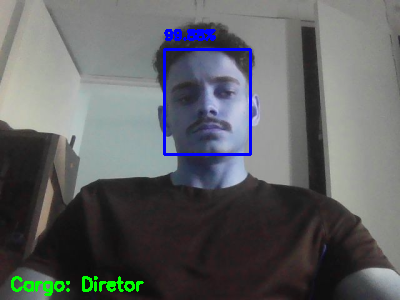

In [ ]:
# Adiciona o cargo como texto na imagem
cv2.putText(image, f"Cargo: {cargo}", (10, h - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

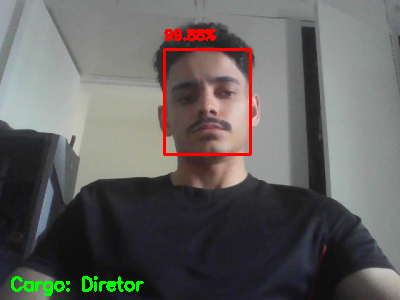

In [ ]:
cv2_imshow(image)